In [1]:
#!python -m pip install '../package/'
#!python -m pip install pandas
#!python -m pip install plotnine
#!python -m pip install ipywidgets

In [5]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_vline, theme_minimal, xlim
import plotnine as pl
from changepoint_online import *
import pickle

In [6]:
np.random.seed(0)
Y = np.concatenate((np.random.normal(loc=0.0, scale=1.0, size=1000),
                    np.random.normal(loc=-2.0, scale=1.0, size=1000),
                    np.random.normal(loc=1.0, scale=1.0, size=1000)))

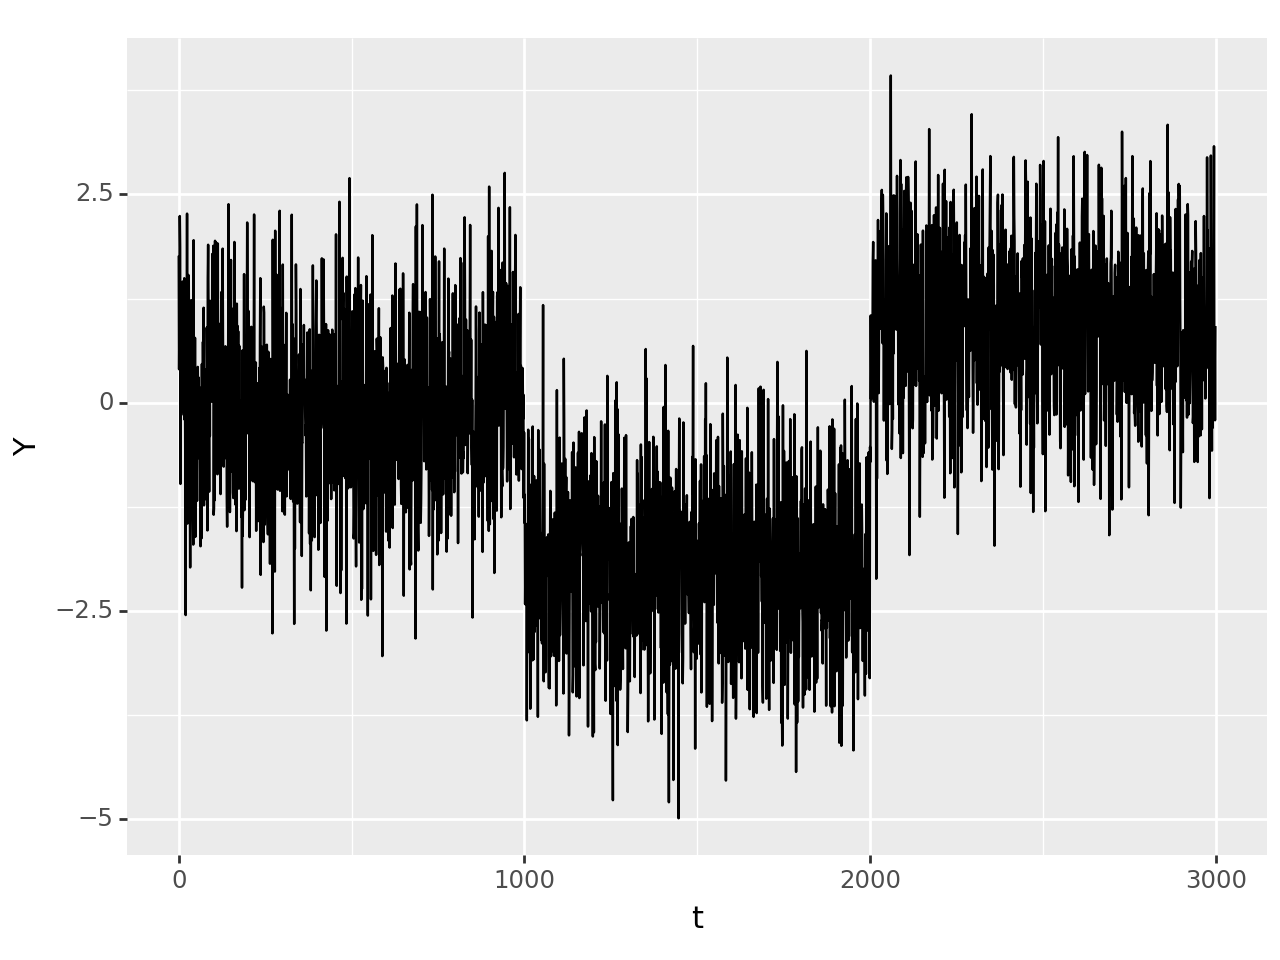

<Figure Size: (640 x 480)>

In [7]:
df = pd.DataFrame({'t' : range(Y.size), 'Y': Y})
(ggplot(df, aes(x='t', y='Y')) +
        geom_line())

For detecting just down changes we up changes:

In [8]:
threshold = 10.0

detector = Focus(Gaussian(), side="right")
for y in Y:
    detector.update(y)
    if detector.statistic() >= threshold:
        break
detector.changepoint()

{'stopping_time': 2009, 'changepoint': 2002}

In [9]:
threshold = 10.0

detector = Focus(Gaussian(), side="right")
for y in Y:
    detector.update(y)
    if detector.statistic() >= threshold:
        break
detector.changepoint()

{'stopping_time': 2009, 'changepoint': 2002}

## Up-Only changes: NeuroSpike inference

In [10]:
with open("exe_trace.pkl", "rb") as f:
    neur_trace = pickle.load(f)

Plotting the trace (and the real spike times, in orange):

/home/romano/Dropbox/changepoint.online/python/.venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_vline : Removed 823 rows containing missing values.
/home/romano/Dropbox/changepoint.online/python/.venv/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 43229 rows containing missing values.


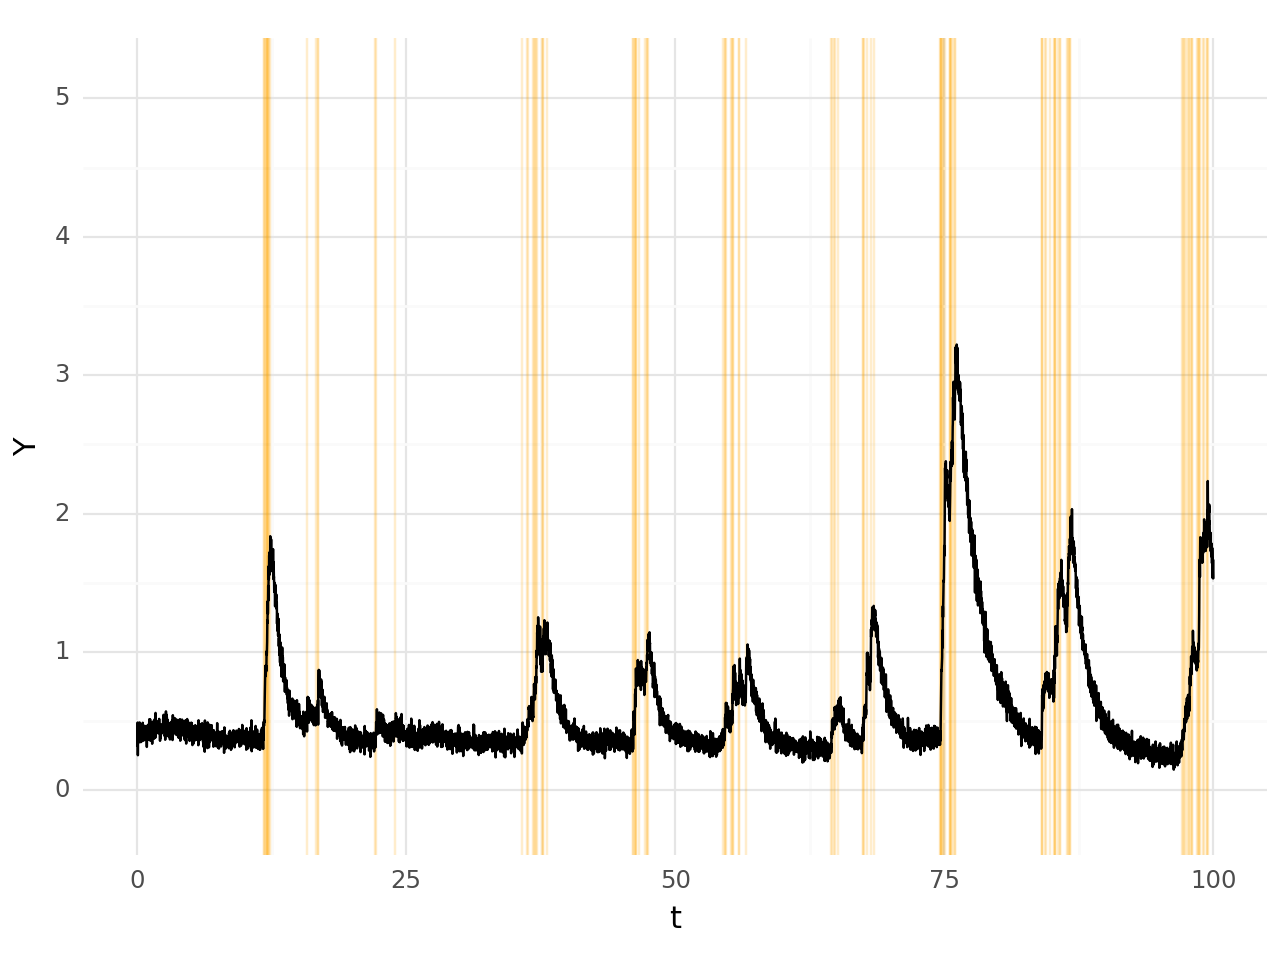

<Figure Size: (640 x 480)>

In [11]:
df = pd.DataFrame({'t' : neur_trace["time"], 'Y': neur_trace["trace"]})
(ggplot(df, aes(x='t', y='Y')) + 
    pl.geom_vline(xintercept = neur_trace["spikes"], alpha = 0.2, colour = "orange") +
    geom_line() + 
    xlim(0, 100) +
    theme_minimal()
)

In [13]:
Y = neur_trace["trace"]
threshold = .1
detector = Focus(Gaussian(), side="right")
cpt_found = False
stp_list = []
cpt_list = []

for t, y in enumerate(Y):

    detector.update(y)
    if detector.statistic() >= threshold:
        cpt_found = True
    
    if cpt_found:
        stp_list.append(neur_trace["time"][t])
        cpt_list.append(detector.changepoint()["changepoint"])
        cpt_found = False
        detector = Focus(Gaussian(), side="right")

cpt_list = np.cumsum(cpt_list)
cpt_list = np.array(neur_trace["time"])[cpt_list]

Running the experiment restarting the changepoint detector gives us:

/home/romano/Dropbox/changepoint.online/python/.venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_vline : Removed 173 rows containing missing values.
/home/romano/Dropbox/changepoint.online/python/.venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_vline : Removed 801 rows containing missing values.
/home/romano/Dropbox/changepoint.online/python/.venv/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 45228 rows containing missing values.


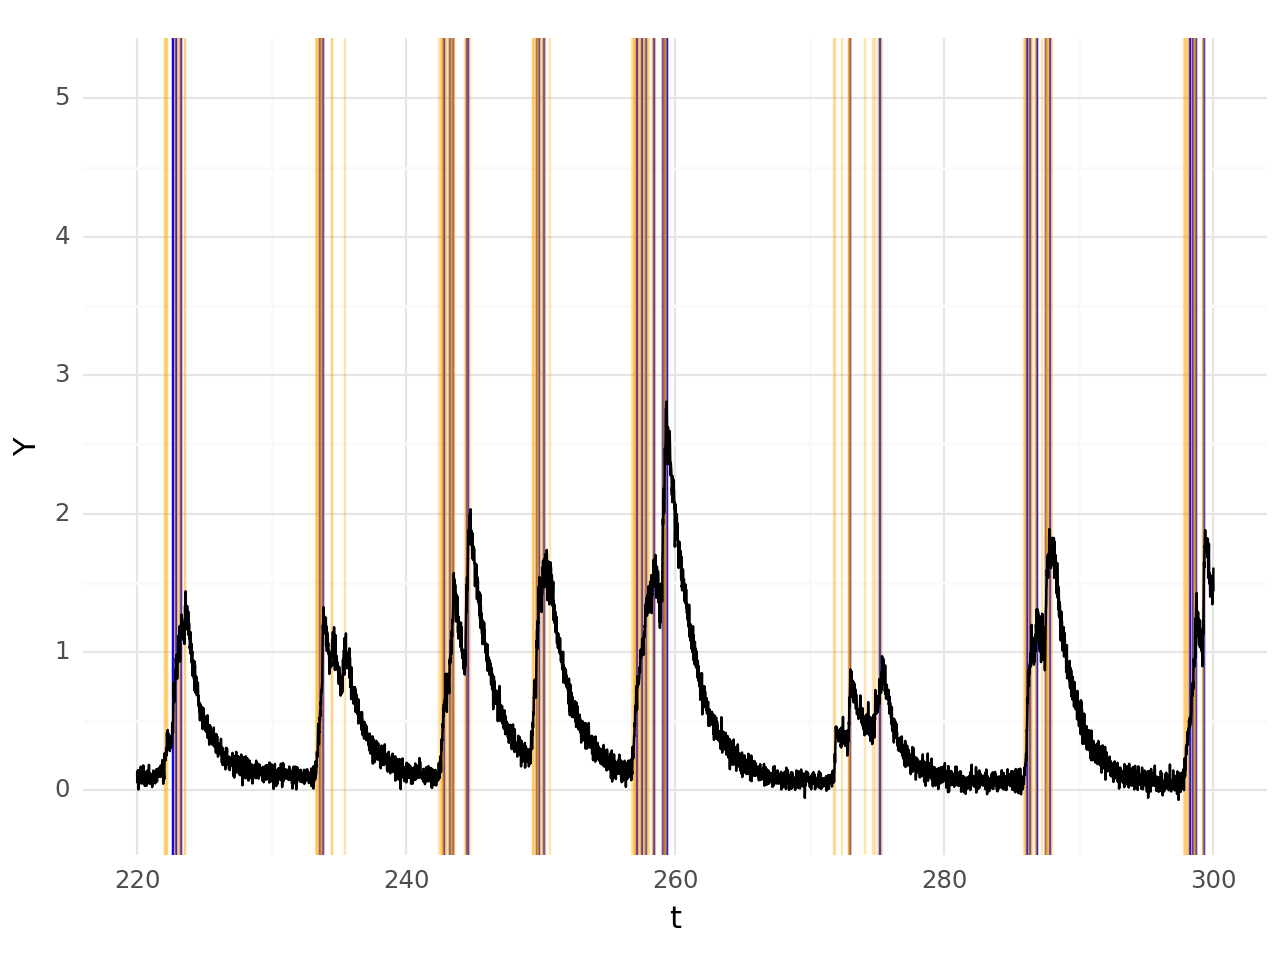

<Figure Size: (640 x 480)>

In [14]:
df = pd.DataFrame({'t' : neur_trace["time"], 'Y': neur_trace["trace"]})
(ggplot(df, aes(x='t', y='Y')) + 
    pl.geom_vline(xintercept = stp_list, colour = "blue") +
    pl.geom_vline(xintercept = neur_trace["spikes"], alpha = 0.3, colour = "orange") +
    geom_line() + 
    xlim(220, 300) + 
    theme_minimal()
)